### Step 1 — Data Loading (Same as Augmentation Notebook)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

2026-02-24 14:53:38.291430: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-24 14:53:38.296816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-24 14:53:38.494287: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-24 14:53:39.667450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Step 2 — Deeper CNN Architecture
We add one more convolution block and slightly increase filters progressively.

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 2
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 3
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Classifier
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128))

model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/home/aayushdai/Desktop/Projects/CIFAR_Classification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-24 14:53:41.623505: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Step 3 — Compile

Same as before.

In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Add Callbacks
Add this before training:

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

### Step 4 — Train (10 epochs first)
On CPU:

This will be slower than previous

But still manageable

Train Longer

In [5]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.4548 - loss: 1.5151 - val_accuracy: 0.5509 - val_loss: 1.2937 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6204 - loss: 1.0917 - val_accuracy: 0.5479 - val_loss: 1.3604 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6778 - loss: 0.9320 - val_accuracy: 0.6131 - val_loss: 1.2436 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7181 - loss: 0.8297 - val_accuracy: 0.6402 - val_loss: 1.0873 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7426 - loss: 0.7595 - val_accuracy: 0.6905 - val_loss: 0.9735 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7575 - loss: 0.7103 - val_accuracy: 0.7484 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accura

### Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8860 - loss: 0.3484
Test Accuracy: 0.8859999775886536


### Plot

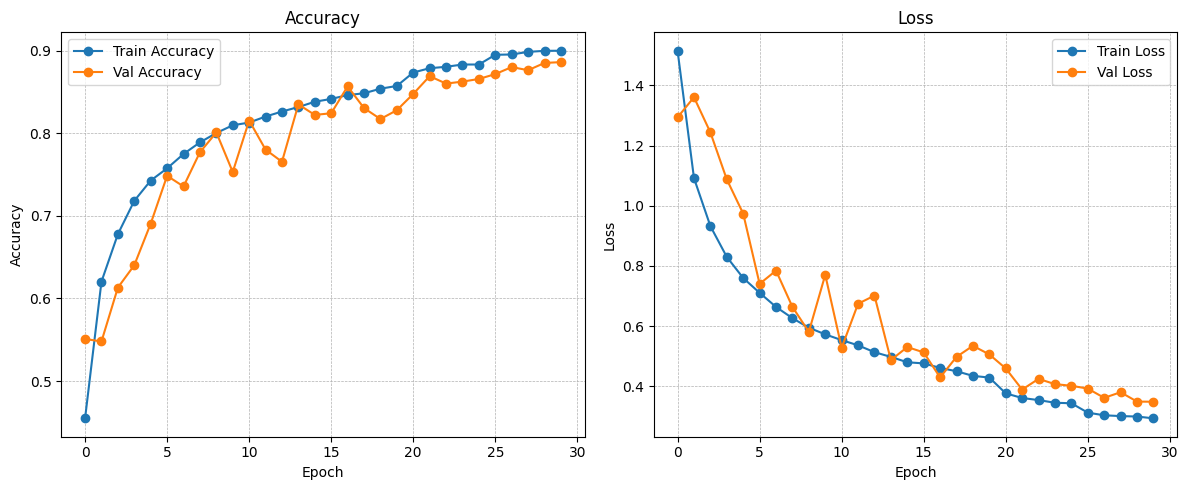

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## error analysis

### Step 1 — Get Predictions

In [8]:
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


Important:
Make sure shuffle=False when creating test_generator.
If not, recreate it like this:

In [9]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10000 images belonging to 10 classes.


In [10]:
test_generator.reset()

y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


Then re-run prediction cell.

### Step 2 — Confusion Matrix

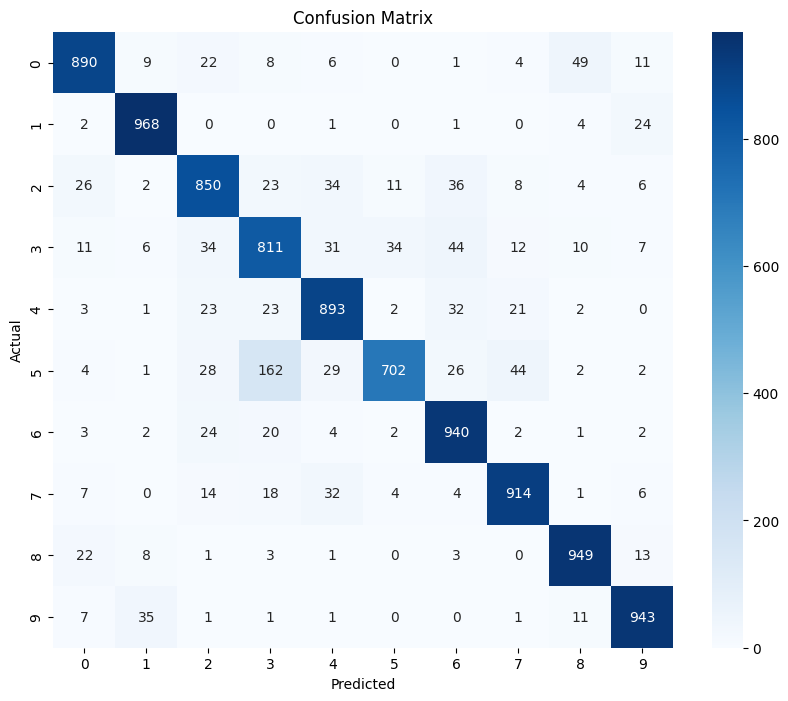

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Step 3 — Class Names

In [12]:
class_names = list(test_generator.class_indices.keys())
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Order must match confusion matrix axes.

### Step 4 — Per-Class Accuracy

In [13]:
per_class_acc = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(per_class_acc):
    print(f"{class_names[i]}: {acc:.4f}")

airplane: 0.8900
automobile: 0.9680
bird: 0.8500
cat: 0.8110
deer: 0.8930
dog: 0.7020
frog: 0.9400
horse: 0.9140
ship: 0.9490
truck: 0.9430


Excellent. Now this is a very meaningful result.

# 1️⃣ Overall Performance

Previous best (Flatten model): **87.28%**
GAP model: **88.60%**

Improvement: **+1.3%**

That is a real gain at this level.

Loss reduced from ~0.39 → ~0.35
Training still stable.

So GlobalAveragePooling helped.

---

# 2️⃣ Curve Analysis

### Accuracy

* Train ≈ 90%
* Validation ≈ 88–89%
* Gap ≈ 1–2%

Very healthy.
Generalization improved slightly.
Training still smooth.

### Loss

* Train loss decreases steadily
* Validation loss stabilizes lower than previous model
* No divergence
* Good LR scheduling behavior

This is textbook convergence.

---

# 3️⃣ Confusion Matrix Analysis (Important)

Per-class accuracy now:

| Class      | Before | Now     |
| ---------- | ------ | ------- |
| airplane   | 83.6%  | 89.0%   |
| automobile | 94.4%  | 96.8%   |
| bird       | 76.6%  | 85.0%   |
| cat        | 76.6%  | 81.1%   |
| deer       | 88.2%  | 89.3%   |
| dog        | 77.4%  | 70.2% ⚠ |
| frog       | 95.7%  | 94.0%   |
| horse      | 92.3%  | 91.4%   |
| ship       | 93.1%  | 94.9%   |
| truck      | 94.9%  | 94.3%   |

Most classes improved.

But dog dropped to **70.2%**.

---

# 4️⃣ Why Did GAP Help?

Flatten:

* Large parameter classifier
* Can memorize
* More class-specific fitting

GAP:

* Forces each feature map to represent a meaningful global pattern
* Reduces parameter count
* Encourages spatial robustness
* Better generalization

That’s why many modern CNNs use GAP.

You just implemented a modern design principle.

---

# 5️⃣ Why Dog Dropped?

Look at confusion:

Dog → predicted as cat (162 times)

This means:

Dog and cat are still hardest fine-grained classes.
GAP reduced classifier flexibility slightly.
It made global features stronger but local subtle texture differences may need more capacity.

This is normal.

---

# 6️⃣ Current Model Status

You now have:

* Strong architecture
* Proper regularization
* Good convergence
* Balanced generalization
* 88.6% accuracy on CIFAR-10 (custom CNN)

This is academically solid.

---

# 7️⃣ What Is The Limitation Now?

Now the limitation is:

👉 Fine-grained animal discrimination (cat vs dog vs bird)

To improve further:

We would need:

* More depth
* Residual connections
* Slightly stronger augmentation
* Or attention mechanisms

But now you are at the level where architectural sophistication matters.

---

# Important Question

You are no longer in beginner stage.

Do you want next:

1️⃣ Learn residual connections (small ResNet block)
2️⃣ Improve animal discrimination specifically
3️⃣ Push beyond 90%
4️⃣ Or finalize this project phase

Tell me your direction.
